## 1. Imports

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

## 2. Get the Data

In [184]:
df=pd.read_csv('train_dataset.csv')

In [185]:
df.head()

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,sex_F,sex_I,sex_M,rings
0,124,97,41,243.8,77.5,50.1,77.0,0,0,1,14
1,109,88,27,183.7,85.8,40.3,47.5,1,0,0,10
2,136,108,38,324.6,143.3,70.8,94.3,0,0,1,12
3,110,88,33,172.1,62.4,33.8,60.0,0,1,0,17
4,78,60,20,53.3,22.1,11.8,16.8,0,1,0,7


## 3. Explore the data (Statistical)

In [186]:
df.shape

(3550, 11)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          3550 non-null   int64  
 1   diameter        3550 non-null   int64  
 2   height          3550 non-null   int64  
 3   whole-weight    3550 non-null   float64
 4   shucked-weight  3550 non-null   float64
 5   viscera-weight  3550 non-null   float64
 6   shell-weight    3550 non-null   float64
 7   sex_F           3550 non-null   int64  
 8   sex_I           3550 non-null   int64  
 9   sex_M           3550 non-null   int64  
 10  rings           3550 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 305.2 KB


In [188]:
df.describe()

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,sex_F,sex_I,sex_M,rings
count,3550.000000,3550.000000,3550.000000,3550.000000,3550.00000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000,3550.000000
mean,104.649014,81.449296,27.875493,165.574085,71.86462,36.039690,47.641493,0.308451,0.322817,0.368732,9.925915
std,24.143150,19.944770,8.506358,98.768181,44.78615,22.012372,27.932808,0.461919,0.467619,0.482529,3.230225
min,15.000000,11.000000,0.000000,0.400000,0.20000,0.100000,0.300000,0.000000,0.000000,0.000000,1.000000
25%,90.000000,69.000000,23.000000,88.025000,36.80000,18.400000,26.000000,0.000000,0.000000,0.000000,8.000000
50%,109.000000,85.000000,28.000000,159.400000,67.10000,34.000000,46.000000,0.000000,0.000000,0.000000,9.000000
75%,123.000000,96.000000,33.000000,230.875000,100.60000,50.400000,66.000000,1.000000,1.000000,1.000000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.60000,152.000000,201.000000,1.000000,1.000000,1.000000,29.000000


Histograms

<AxesSubplot: xlabel='length', ylabel='Count'>

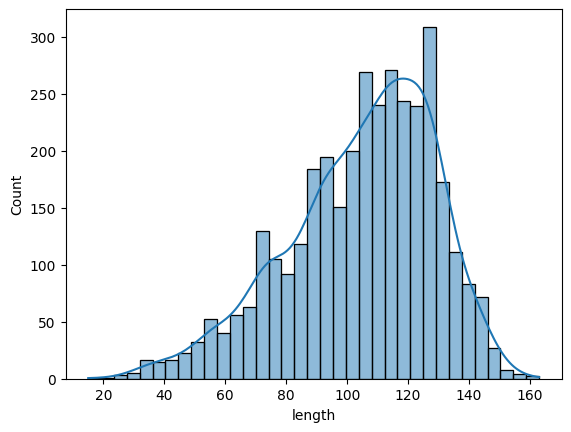

In [189]:
sns.histplot(data=df,x='length',kde=True)

<AxesSubplot: xlabel='diameter', ylabel='Count'>

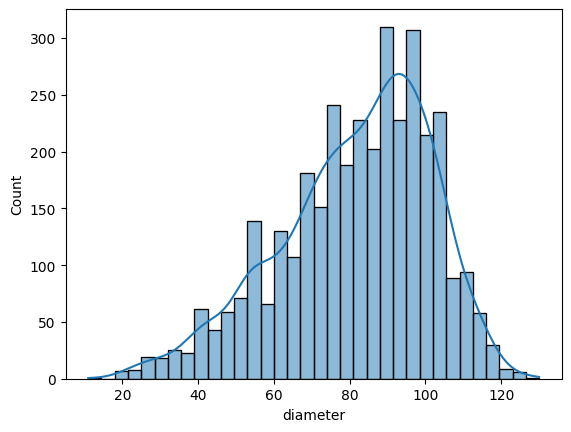

In [190]:
sns.histplot(data=df,x='diameter',kde=True)

<AxesSubplot: xlabel='height', ylabel='Count'>

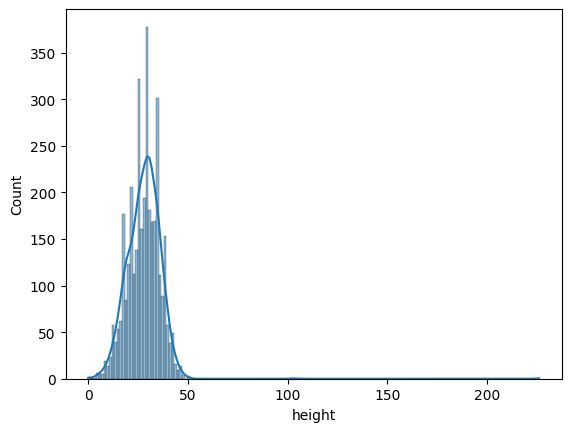

In [191]:
sns.histplot(data=df,x='height',kde=True)

<AxesSubplot: xlabel='whole-weight', ylabel='Count'>

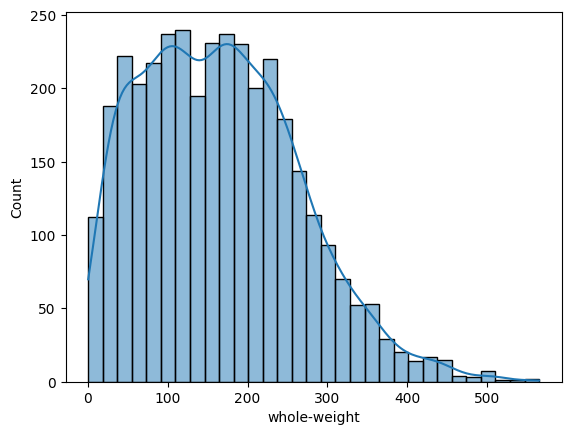

In [192]:
sns.histplot(data=df,x='whole-weight',kde=True)

<AxesSubplot: xlabel='shucked-weight', ylabel='Count'>

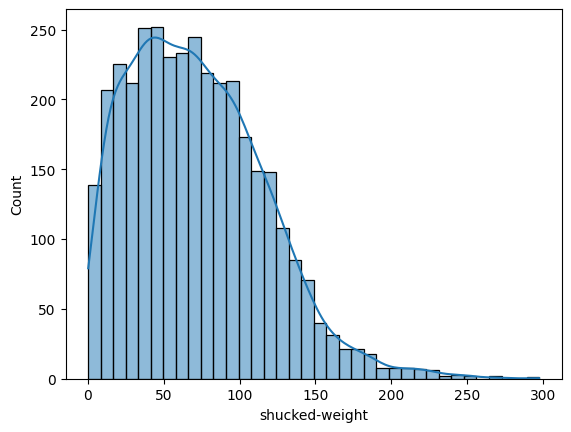

In [193]:
sns.histplot(data=df,x='shucked-weight',kde=True)

<AxesSubplot: xlabel='viscera-weight', ylabel='Count'>

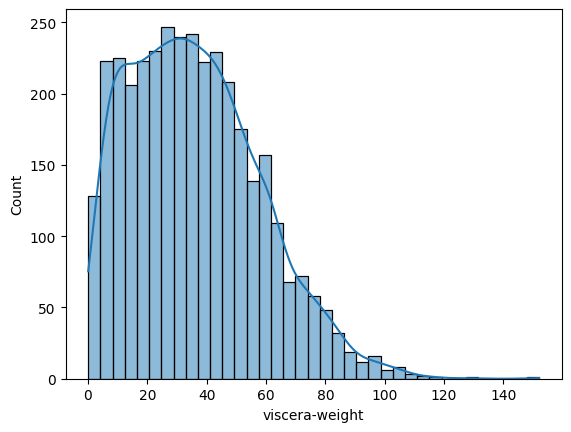

In [194]:
sns.histplot(data=df,x='viscera-weight',kde=True)

<AxesSubplot: xlabel='shell-weight', ylabel='Count'>

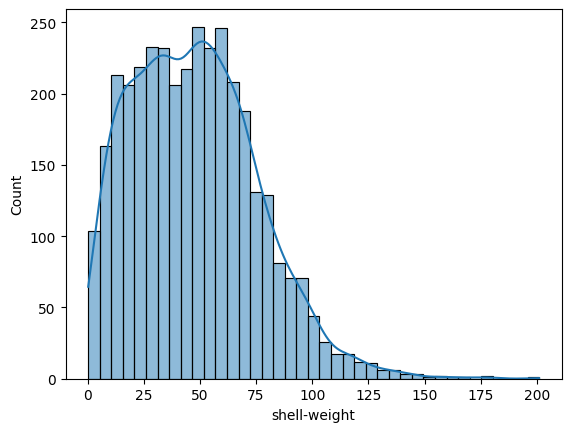

In [195]:
sns.histplot(data=df,x='shell-weight',kde=True)

1. We can see that the length, diameter is a little left skewed in the distribution. 
2. The height is symmetrically distributed but there are few outliers as the graph extends towards right. We can also see that the maximum value of height is 226 and 75 % of data lies under 33. So we need to solve this problem
3. All the weights are right skewed completely

In [196]:
corr=df.corr()

<AxesSubplot: >

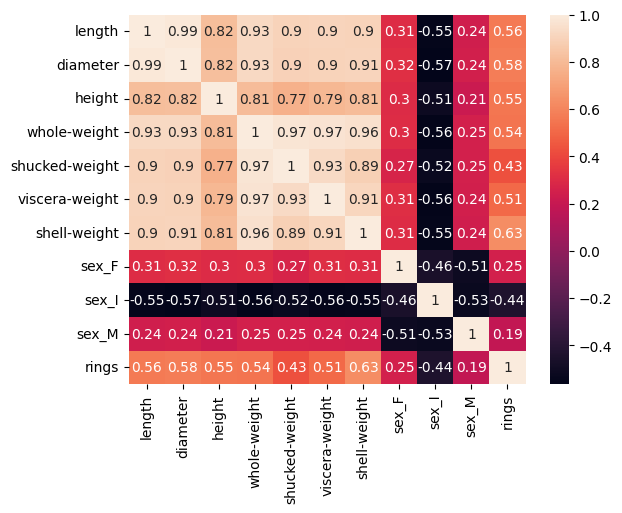

In [197]:
sns.heatmap(corr,annot=True)

## 4. Prepare the data

### Data Cleaning

#### Cleaning Height Column

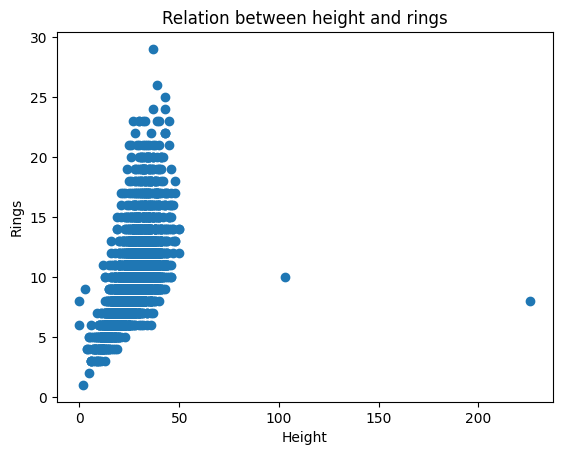

In [198]:
plt.scatter(df['height'],df['rings'])
plt.title("Relation between height and rings")
plt.xlabel("Height")
plt.ylabel("Rings")
plt.show()

We will remove data points greater than 75

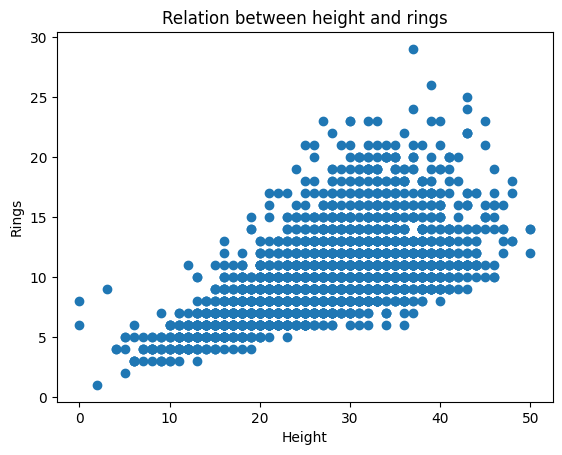

In [199]:
df=df[df['height']<=75]
plt.scatter(df['height'],df['rings'])
plt.title("Relation between height and rings")
plt.xlabel("Height")
plt.ylabel("Rings")
plt.show()

<AxesSubplot: xlabel='height', ylabel='Count'>

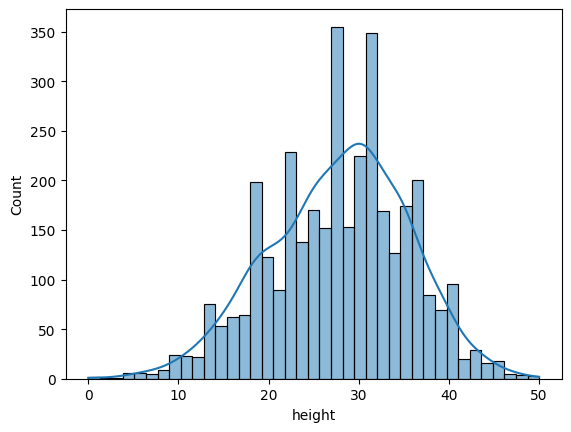

In [200]:
sns.histplot(data=df,x='height',kde=True)

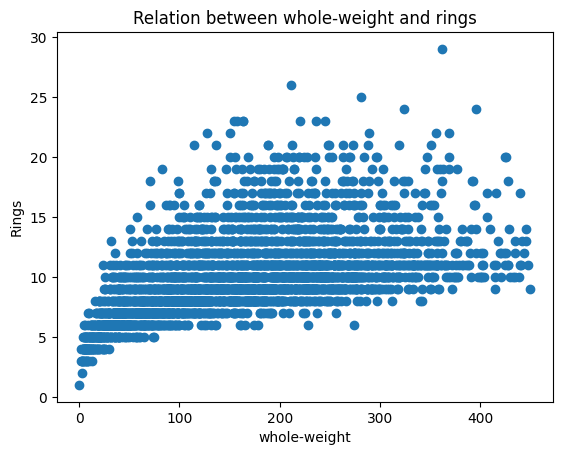

In [201]:
df=df[df['whole-weight']<=450]
plt.scatter(df['whole-weight'],df['rings'])
plt.title("Relation between whole-weight and rings")
plt.xlabel("whole-weight")
plt.ylabel("Rings")
plt.show()

### Feature selection

In [202]:
X=df.drop(['rings'],axis=1)
Y=df['rings']

In [203]:
X.shape,Y.shape

((3526, 10), (3526,))

In [204]:
x,x_test,y,y_test=train_test_split(X,Y,test_size=0.2)
feature_model=ExtraTreesRegressor()
feature_model.fit(x,y)
feature_importance=feature_model.feature_importances_

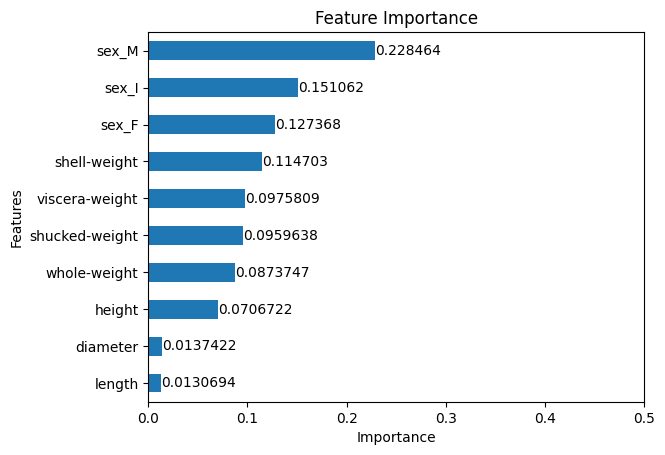

In [205]:
ft_imp=pd.Series(sorted(feature_importance),index=x.columns)
ax=ft_imp.plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.xlim([0,0.5])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [206]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    sns.heatmap(corr_matrix,annot=True)
    return col_corr    

Highly Correlated Features must be dropped

{'diameter', 'whole-weight', 'shucked-weight', 'height', 'viscera-weight', 'shell-weight'}


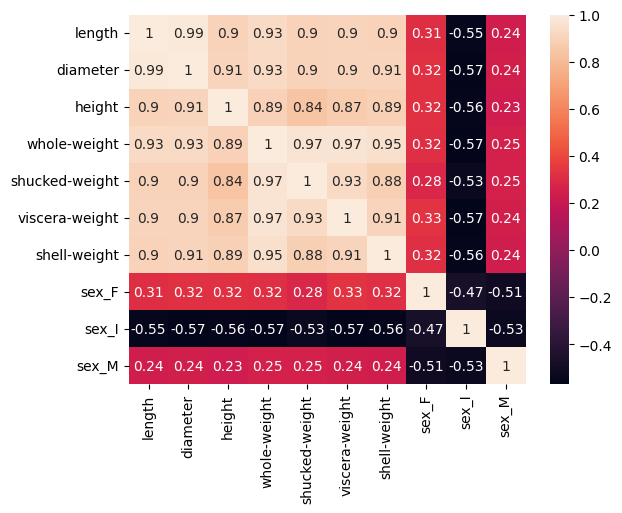

In [207]:
print(correlation(x,0.75))

In [208]:
x.drop(['shell-weight', 'viscera-weight', 'shucked-weight', 'diameter','sex_F'],axis=1,inplace=True)

### Feature scaling

In [209]:
x.describe()

,length,height,whole-weight,sex_I,sex_M
count,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,104.494326,27.752482,164.500035,0.326950,0.363121
std,24.122712,7.665711,96.128750,0.469182,0.480984
min,15.000000,0.000000,0.400000,0.000000,0.000000
25%,90.000000,23.000000,87.700000,0.000000,0.000000
50%,109.000000,28.000000,159.950000,0.000000,0.000000
75%,123.000000,33.000000,230.125000,1.000000,1.000000
max,155.000000,50.000000,450.000000,1.000000,1.000000


In [210]:
length_scale=MinMaxScaler()
x['length']=length_scale.fit_transform(np.array(x['length']).reshape(-1,1))

height_scale=MinMaxScaler()
x['height']=length_scale.fit_transform(np.array(x['height']).reshape(-1,1))

length_scale=MinMaxScaler()
x['whole-weight']=length_scale.fit_transform(np.array(x['whole-weight']).reshape(-1,1))

In [211]:
x.describe()

,length,height,whole-weight,sex_I,sex_M
count,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,0.639245,0.555050,0.364991,0.326950,0.363121
std,0.172305,0.153314,0.213809,0.469182,0.480984
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.535714,0.460000,0.194173,0.000000,0.000000
50%,0.671429,0.560000,0.354871,0.000000,0.000000
75%,0.771429,0.660000,0.510954,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Model selection

In [212]:
model=RandomForestRegressor()
# model.fit(x,y)

In [213]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

max_features=['auto','sqrt']

max_depth=[int(x) for x in np.linspace(start=5, stop=30,num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [214]:
random_parameters={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [215]:
parameter_model=RandomizedSearchCV(
    estimator=model,
    param_distributions=random_parameters,
    scoring='neg_mean_squared_error',
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)

In [216]:
parameter_model.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.9s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.9s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.1s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.1s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.0s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.3s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.0s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.0s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.1s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.1s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.6s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.7s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   6.0s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.5s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  12.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.2s
[CV] END max_depth=5, max_feat

d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   6.9s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   8.1s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   7.5s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   7.0s


d:\prashant\softwares\Python\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   7.8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

## 7. Model Evalutation

In [217]:
x_test.drop(['shell-weight', 'viscera-weight', 'shucked-weight', 'diameter','sex_F'],axis=1,inplace=True)
x_test['height']=height_scale.fit_transform(np.array(x_test['height']).reshape(-1,1))
x_test['length']=length_scale.fit_transform(np.array(x_test['length']).reshape(-1,1))
# predictions=model.predict(x_test)
predictions=parameter_model.predict(x_test)

C:\Users\Prashant\AppData\Local\Temp\ipykernel_10724\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<AxesSubplot: xlabel='rings', ylabel='Density'>

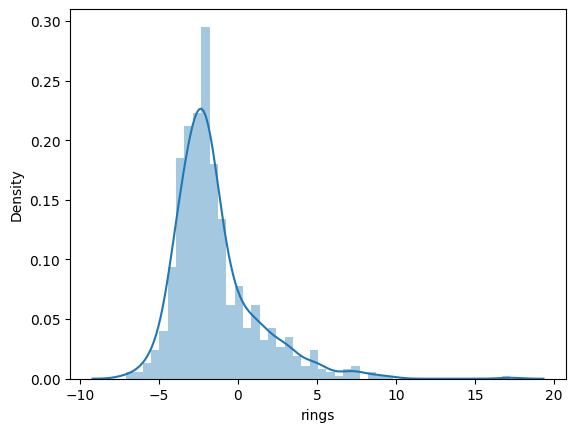

In [218]:
sns.distplot(y_test-predictions)

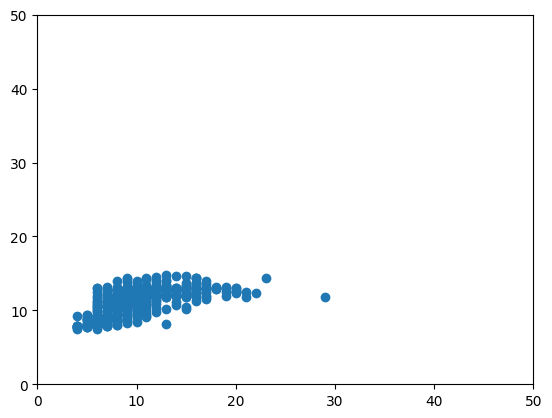

In [219]:
plt.scatter(y_test,predictions)
plt.xlim([0,50])
plt.ylim([0,50])
plt.show()

In [220]:
r2_score(y_test,predictions)

0.1496052030608861

In [221]:
mean_squared_error(y_test,predictions)

9.023867797081826